In [1]:
# library
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os
import matplotlib.pyplot as plt

# [IAPR][iapr]: Project


**Group ID:** 32

**Author 1 (sciper):** Alexia Dormann (301997)
**Author 2 (sciper):** Valgerdur Jónsdóttir (351819)
**Author 3 (sciper):** Mariia Eremina (342236)

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](../data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="../data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="../data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle, you are always expected to find exactly 9, 12, 16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 2.1. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 2.2 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [2]:
def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path, folder ,filename )
    
    im= Image.open(os.path.join(path, folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [3]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
    return image_loaded , solved_puzzles , outlier_images

#im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

In [4]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
#im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

solving  6
solving  10


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$


In [5]:
# library
import skimage.filters
import skimage.io
import cv2
import math

## 4.1. Segmenting the puzzle pieces

We use a edge detection method.

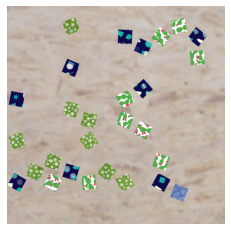

In [6]:
#Load image to explore 
img = skimage.io.imread('data_project/train2/train_02.png')

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
def segment_pieces(img):
    '''
    Segment the puzzle pieces.
    :param img: img to be segmented
    :return seg: img with drawn segmentation lines
    :return contours: contours of the puzzle pieces
    '''
    
    img_copy = img.copy()
    
    # Preprocessing: blur image
    blur = cv2.medianBlur(img,ksize= 21)
    
    # Find edges
    canny = cv2.Canny(blur, 20, 50, 1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(canny, kernel, iterations=3)
    
    # Fill in big contours to remove edges inside pieces
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    fill_in = np.zeros_like(img)
    for c in contours:
        fill_in = cv2.drawContours(fill_in, [c], 0, (255,0,0), thickness=cv2.FILLED)
        
    # Find minrect fitting in fill_in contours
    canny = cv2.Canny(fill_in, 10, 100, 1)
    contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
    
        seg = cv2.drawContours(img_copy,[box],0,(0,255,0), 3)
        
    return seg, contours[::2]
    

In [8]:
def extract_pieces(img, contours):
    '''
    Extract the puzzle pieces using the segmentation.
    :param img: image from which the pieces are extracted
    :param contours: contours of puzzle pieces on the image
    :return pieces: list of the extracted puzzle pieces
    '''
    
    pieces = []
    for c in contours:
        # Find angle and center of min rectangle fitting in each contours
        rect = cv2.minAreaRect(c)
        angle, center = rect[2], rect[0]
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Extract only current puzzle piece on image
        temp = cv2.drawContours(np.zeros_like(img),[box],0 , (255,255,255) , thickness=cv2.FILLED)
        idx_puzzle = np.where(temp == 255)
        piece = np.zeros_like(img); piece[idx_puzzle] = img[idx_puzzle]
    
        # Rotate image so that piece is centered
        rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_piece = cv2.warpAffine(piece, rot_mat, piece.shape[1::-1], flags=cv2.INTER_LINEAR)
        
        # Extract piece by cropping image
        idx_piece = np.where(rotated_piece!=0)
        x, y = np.min(idx_piece[1])+10, np.min(idx_piece[0])+10
        crop = rotated_piece[y:y+128, x:x+128,:]
        pieces.append(crop)
    
    return pieces


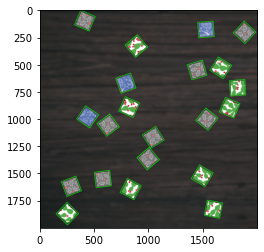

In [9]:
img = skimage.io.imread('data_project/train2/train_03.png')
seg, contours = segment_pieces(img)
plt.imshow(seg); plt.show()

In [10]:
def display_images_in_grid(puzzle_pieces, cmap = None):
    '''
    Display the puzzle pieces in a grid.
    :param puzzle_pieces: list of puzzle pieces
    :param cmap: color map
    '''

    # Determine grid size based on the number of images
    grid_size = math.ceil(math.sqrt(len(puzzle_pieces)))

    fig, axs = plt.subplots(grid_size, grid_size)

    for i, ax in enumerate(axs.flatten()):
        if i < len(puzzle_pieces):
            if cmap is None:
                ax.imshow(puzzle_pieces[i])
            else:
                ax.imshow(puzzle_pieces[i], cmap=cmap)
            ax.axis('off')  # Hide axes
        else:
            fig.delaxes(ax)  # Remove empty subplots

    fig.suptitle('Number of puzzle pieces: ' + str(len(puzzle_pieces)), fontsize=12)
    plt.show()

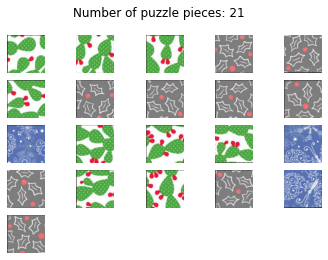

In [11]:
puzzles = extract_pieces(img, contours)
display_images_in_grid(puzzles)

## 4.2. Extracting features of interest

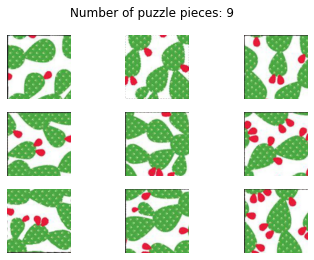

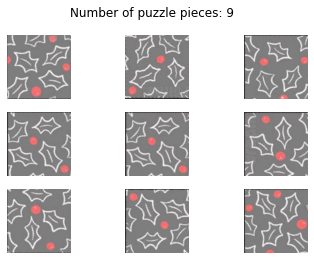

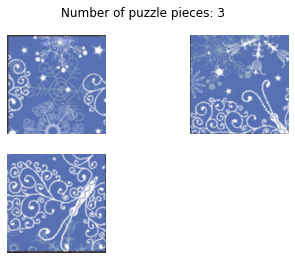

In [12]:
#### manually labeled pieces - can be used for validation
puzzle1 = [puzzles[0], puzzles[1], puzzles[2], puzzles[5], puzzles[11], puzzles[12], puzzles[13], puzzles[16], puzzles[17]]
display_images_in_grid(puzzle1)

puzzle2 = [puzzles[3], puzzles[4], puzzles[6], puzzles[7], puzzles[8], puzzles[9], puzzles[15], puzzles[18], puzzles[20]]
display_images_in_grid(puzzle2)

puzzle3 = [puzzles[10], puzzles[14], puzzles[19]]
display_images_in_grid(puzzle3)

### Color features
Color histograms represent color distribution in an image. Thus, we can use them to describe the color of the puzzle pieces. We will use the color histogram as a feature vector. The color histogram is a 3D histogram, where each dimension represents the color channel (red, green, blue). The histogram is computed for each channel and then concatenated into a single feature vector. However, color histograms do not capture spatial information, so we need to keep in mind that two completely different images can have the same color histogram.

Three different color features are computed from the color histogram of each puzzle piece:
1. Mean and standard deviation of each color channel.
2. Average red and green color values of the image.

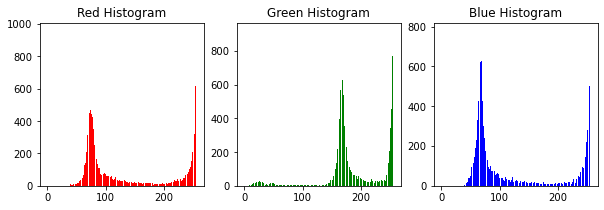

In [13]:
def plot_color_histogram(img):
    '''
    Plot the color histogram of an image.
    param img: image of which the color histogram is plotted
    '''
    # Compute color histograms
    red_hist = np.histogram(img[:,:,0], bins=256, range=[0,256])
    green_hist = np.histogram(img[:,:,1], bins=256, range=[0,256])
    blue_hist = np.histogram(img[:,:,2], bins=256, range=[0,256])

    # Plot histograms
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.bar(red_hist[1][:-1], red_hist[0], color='red')
    plt.title('Red Histogram')
    plt.subplot(1, 3, 2)
    plt.bar(green_hist[1][:-1], green_hist[0], color='green')
    plt.title('Green Histogram')
    plt.subplot(1, 3, 3)
    plt.bar(blue_hist[1][:-1], blue_hist[0], color='blue')
    plt.title('Blue Histogram')
    plt.show()

# test the function
plot_color_histogram(puzzles[11])

In [14]:
def color_histogram(img, bins=(8,8,8)):
    '''
    Extract color histogram features from the image.
    :param img: image in RGB color space from which the features are extracted
    :param bins: number of bins for each channel
    :return hist: color histogram
    '''

    # Compute the color histogram
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

    # Normalize histogram so the sum of all bin heights is 1 and flatten
    hist = cv2.normalize(hist, hist).flatten()

    return hist

In [15]:
def mean_std_hist(rgb_histogram):
    '''
    Compute the mean and standard deviation of the color histogram, to use as features.
    :param rgb_histogram: color histogram
    :return mean: mean of the color histogram
    :return std: standard deviation of the color histogram
    '''
    mean = np.mean(rgb_histogram)
    std = np.std(rgb_histogram)
    return mean, std

def average_color(img):
    '''
    Compute the average red and green value of the image.
    :param img: image in RGB color space
    :return avg_red: average red value
    '''
    avg_red = np.mean(img[:,:,0])
    avg_green = np.mean(img[:,:,1])
    avg_blue = np.mean(img[:,:,2])
    return avg_red, avg_green, avg_blue

### Texture features
We can use Gabor filters to classify textures. Gabor filters are linear filters used for texture analysis, so they are able to analyze and understand the structural content or patterns in an image.

2D Gabor filters have rich applications in image processing, especially in feature extraction for texture analysis and segmentation. $f$ defines the frequency being looked for in the texture. By varying $\theta$, we can look for texture oriented in a particular direction. By varying $\sigma$, we change the size of the image region being analyzed.

The scale of a Gabor filter is determined primarily by the wavelength (λ) of the sinusoidal wave in the Gabor function and also by the standard deviation (σ) of the Gaussian function.

1. **Wavelength (λ):** This parameter determines the frequency of the sinusoidal part of the Gabor filter and thus defines the size of the structures (e.g., edges, lines) that the filter will respond to. For example, a Gabor filter with a small λ value will respond to high-frequency changes (small, finely detailed structures), while a filter with a large λ value will respond to low-frequency changes (large, coarse structures).

2. **Standard deviation (σ) of the Gaussian function:** This parameter controls the spatial extent of the Gabor filter (i.e., the size of the Gaussian window). A larger σ results in a larger filter size, which means the filter captures a larger area or scale in the image. Conversely, a smaller σ results in a smaller filter size, which captures a smaller area or scale in the image.

Gabor features:
1. Mean
2. Standard deviation
3. Kurtosis: measures the "tailedness" of the distribution. High kurtosis might suggest the presence of strong edge-like or line-like features (which would generate high-magnitude responses from the Gabor filter), whereas a low kurtosis could indicate a more homogeneous or smooth texture.
4. Power spectrum: compute power spectrum of the filter responses and use features such as the peak frequency, bandwidth, or total power, or mean, median, variance.


In [16]:
# library
import cv2
from scipy import stats 
import scipy.stats as stats
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
def gabor_filter(ksize, sigma, theta, lambd, gamma = 1, psi = 0):
    '''
    Define a gabor filter that can be used to extract texture features.
    :param ksize: size of gabor filter, must be an odd number
    :param sigma: standard deviation of the gaussian envelope, size of image region being analyzed
    :param theta: orientation of the function, 0 is horizontal, 90 is vertical
    :param lambd: wavelength of the sinusoidal factor, frequency being looked for in the texture (high frequency = fine details/slim borders, low frequency = coarse details/thick borders)
    :param gamma: spatial aspect ratio
    :param psi: phase offset
    :return: a gabor filter
    '''
    gabor_filter = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    return gabor_filter

In [18]:
def gabor_filter_bank(ksize, sigmas, lambdas, thetas):
    '''
    Create a gabor filter bank.
    :param ksize: size of gabor filter, must be an odd number
    :param sigmas: standard deviation of the gaussian envelope, size of image region being analyzed
    :param lambdas: wavelength of the sinusoidal factor, frequency being looked for in the texture (high frequency = fine details/slim borders, low frequency = coarse details/thick borders)
    :param thetas: orientation of the function, 0 is horizontal, 90 is vertical
    :return: a gabor filter bank
    '''
    gabor_filter_bank = []
    for sigma in sigmas:
        for lambd in lambdas:
            for theta in thetas:
                gabor_filter_bank.append(gabor_filter(ksize, sigma, theta, lambd))
    return gabor_filter_bank

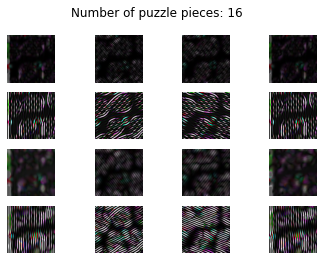

In [19]:
# call the function to create a gabor filter bank
ksize = 31
sigmas = [3, 5]
lambdas = [3, 5]
thetas = [0, 45, 90, 135]
gabor_filter_bank = gabor_filter_bank(ksize, sigmas, lambdas, thetas)

# apply the gabor filter bank to the image
def apply_gabor_filter_bank(img, gabor_filter_bank):
    '''
    Apply a gabor filter bank to the image.
    :param img: image in RGB color space
    :param gabor_filter_bank: gabor filter bank
    :return: list of filtered images
    '''
    filtered_images = []
    for gabor_filter in gabor_filter_bank:
        filtered_image = cv2.filter2D(img, cv2.CV_8UC3, gabor_filter)
        filtered_images.append(filtered_image)
    return filtered_images

# plot filtered images
filtered_images = apply_gabor_filter_bank(puzzles[0], gabor_filter_bank)
display_images_in_grid(filtered_images)

In [20]:
def gabor_features(gabor_images):
    '''
    Extract features from gabor convoluted images, such as mean, standard deviation, kurtosis, power spectrum
    :param gabor_images: list of filtered images
    :return features_mean: list of mean values
    :return features_std: list of standard deviation values
    :return features_kurtosis: list of kurtosis values
    '''
    features_mean = []
    features_std = []
    features_kurtosis = []
    for image in gabor_images:
        # Extract mean of image as a feature
        features_mean.append(np.mean(image))
        # Extract standard deviation of image as a feature
        features_std.append(np.std(image))
        # Extract kurtosis of image as a feature
        kurtosis_value = stats.kurtosis(image.flatten(), fisher=True)
        features_kurtosis.append(kurtosis_value)

    return features_mean, features_std, features_kurtosis

In [21]:
# compute power spectrum of the filter responses
def power_spectrum(gabor_images):
    '''
    Compute power spectrum of the filter responses
    :param gabor_images: list of filtered images
    :return features: list of power spectrum values
    '''
    power_spectrum = []
    for image in gabor_images:
        # Apply Fourier transform
        f = np.fft.fft2(image)
        # shift the zero-frequency component to the center of the spectrum
        fshift = np.fft.fftshift(f)
        # compute the magnitude spectrum
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        pwr_spectrum = np.abs(magnitude_spectrum)**2
        power_spectrum.append(pwr_spectrum)

    return power_spectrum

def compute_power_spectrum_features(power_spectrum):
    # Flatten every power spectrum
    power_spectrum_reshape = np.array(power_spectrum).reshape((np.array(power_spectrum).shape[0], -1))

    # Compute features
    mean_power = list(np.mean(power_spectrum_reshape, axis=1))
    max_power = list(np.max(power_spectrum_reshape, axis=1))
    std_power = list(np.std(power_spectrum_reshape, axis=1))
    skewness_power = [stats.skew(x) for x in power_spectrum_reshape]
    kurtosis_power = [stats.kurtosis(x, fisher=True) for x in power_spectrum_reshape] 

    return mean_power, max_power, std_power, skewness_power, kurtosis_power

In [22]:
def extract_features(img):
    '''
    Extract features from the image.
    :param img: image in RGB color space
    :return features: dictionary of features
    '''
    # Compute color histogram
    hist = color_histogram(img)

    # Compute mean and standard deviation of color histogram
    mean_color, std_color = mean_std_hist(hist)

    # Compute average red and green value
    avg_red, avg_green, avg_blue = average_color(img)

    # apply gabor filter bank
    # convert img to greyscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gabor_images = apply_gabor_filter_bank(img, gabor_filter_bank)

    # compute gabor features
    mean_gabor, std_gabor, kurtosis_gabor = gabor_features(gabor_images)

    # compute power spectrum of the filter responses
    power_spectrum_ = power_spectrum(gabor_images)

    # extract features from the power spectrum
    mean_power, max_power, std_power, skewness_power, kurtosis_power = compute_power_spectrum_features(power_spectrum_)

    # find features from the power spectrum
    #mean_pwr_spectrum, std_pwr_spectrum, peak_frequency, bandwidth = power_spectrum_features(power_spectrum)
    # define a dict of features
    features = {'mean_color': mean_color, 'std_color': std_color, 'avg_red': avg_red, 'avg_green': avg_green, 'avg_blue': avg_blue,
                'mean_gabor': mean_gabor, 'std_gabor': std_gabor, 'kurtosis_gabor': kurtosis_gabor,
                'mean_power': mean_power, 'max_power': max_power, 'std_power': std_power,
                'skewness_power': skewness_power, 'kurtosis_power': kurtosis_power}

    # Fix the format of features dict
    features_new = {}

    # Iterate over keys and values in the old dictionary
    for key, values in features.items():
        # Check if value is a list
        if isinstance(values, list):
            # Iterate over the list of values
            for i, value in enumerate(values):
                # Create a new key for each value in the list
                new_key = f"{key}_{i+1}"
                # Add the new key-value pair to the new dictionary
                features_new[new_key] = value
        else:
            # If value is not a list, copy the key-value pair to the new dictionary
            features_new[key] = values

    return features_new

In [23]:
# extract features for each piece
features = [extract_features(x) for x in puzzles]
features = pd.DataFrame(features)

#Define label manually
y_true = [1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 2]

features.head()

,mean_color,std_color,avg_red,avg_green,avg_blue,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,...,kurtosis_power_7,kurtosis_power_8,kurtosis_power_9,kurtosis_power_10,kurtosis_power_11,kurtosis_power_12,kurtosis_power_13,kurtosis_power_14,kurtosis_power_15,kurtosis_power_16
0,0.004010,0.044012,161.476624,201.185547,152.950195,14.412109,14.240051,14.702209,13.930420,40.563660,...,1.448627,0.966862,2.429222,2.892763,2.957026,1.907623,1.791348,2.704071,2.283191,1.445609
1,0.004349,0.043980,153.516418,194.719482,140.038269,14.710388,16.256470,14.720276,14.247925,48.813049,...,1.626747,0.737047,2.320839,2.290295,2.482193,2.188546,1.321676,2.472003,2.368995,1.165282
2,0.004192,0.043995,156.800171,193.615967,143.501892,16.260986,12.384338,13.384644,15.708435,46.866272,...,1.568220,0.778341,2.871416,2.752693,2.616266,2.110025,1.482149,2.589765,2.546753,1.168367
3,0.003721,0.044037,145.372559,139.010193,139.338684,16.032532,15.222107,13.779480,16.018982,37.495117,...,1.756675,0.592504,2.396829,2.928047,2.420611,2.124510,1.238447,2.813580,2.352571,1.248623
4,0.003620,0.044046,142.210693,138.443481,138.709717,13.056030,16.583557,13.600708,12.807129,38.411072,...,1.782967,0.726882,2.553949,3.469017,2.252738,2.396837,1.399318,2.685317,2.269542,1.312347


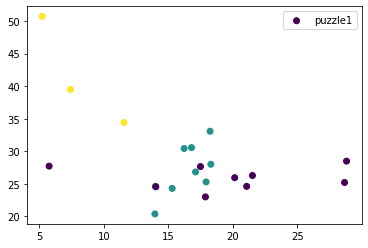

In [24]:
plt.scatter(features['kurtosis_gabor_1'], features['std_gabor_2'], c=y_true)
plt.legend(['puzzle1', 'puzzle2', 'puzzle3'])

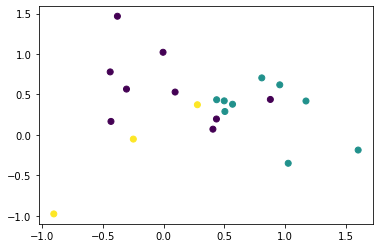

In [25]:
plt.scatter(features['kurtosis_gabor_15'], features['kurtosis_gabor_16'], c=y_true)
plt.show()

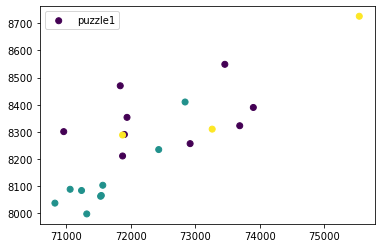

In [26]:
plt.scatter(features['max_power_5'], features['std_power_5'], c=y_true)
plt.legend(['puzzle1', 'puzzle2', 'puzzle3'])
plt.show()

# Feature selection

In [30]:
import warnings

warnings.filterwarnings("ignore")

def extract_features_all_img(directory):
    all_features = []
    for i, file_name in enumerate(os.listdir(directory)):
    
        if file_name.endswith('.png'):
            #Load image
            img = skimage.io.imread(directory + '/' +  file_name)
            
            #Segment image
            seg, contours = segment_pieces(img)
            
            #Extract puzzle pieces
            puzzles = extract_pieces(img, contours)
            
            #Extract features of puzzle feat
            features = [extract_features(x) for x in puzzles]
            features = np.array(pd.DataFrame(features))
            
            #Remplace inf + nan by median if they exist
            features[np.where(np.isinf(features))] = 9999
            
            col_mean = np.nanmedian(features, axis=0)
            inds = np.where(np.isnan(features))
            features[inds] = np.take(col_mean, inds[1])
            
            #Normalize features
            features_normalized = StandardScaler().fit_transform(features)
        
            all_features.append(features_normalized)
            
    return all_features

all_feat = extract_features_all_img('data_project/train2')
all_feat = np.concatenate(all_feat)

In [31]:
all_feat.shape

(304, 132)

## PCA

Explained variation per PC 1: 0.526453057228958
Explained variation per PC 2: 0.08712692462474263
Explained variation per PC 3: 0.05102766239656585
Explained variation per PC 4: 0.04354023223204492
Explained variation per PC 5: 0.036684504612026624
Explained variation per PC 6: 0.02473781148139916
Explained variation per PC 7: 0.022930780760439425
Explained variation per PC 8: 0.018443058261207686
Explained variation per PC 9: 0.014854498850791735
Explained variation per PC 10: 0.013150532965570696
Explained variation per PC 11: 0.01234733062870271
Explained variation per PC 12: 0.011905552880162325
Explained variation per PC 13: 0.01008837730744994
Explained variation per PC 14: 0.009676673635765076
Explained variation per PC 15: 0.00907050650347746
Explained variation per PC 16: 0.008111292736233745
Explained variation per PC 17: 0.00626902870164356
Explained variation per PC 18: 0.006108964219547051
Explained variation per PC 19: 0.00570686148061587
Explained variation per PC 20: 0.

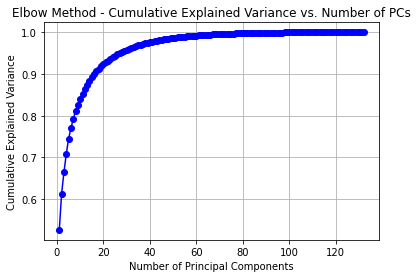

In [32]:
pca = PCA()

# Fit the data and perform PCA
pca.fit(all_feat)

# Access the principal components and explained variance ratios
principal_components = pca.components_
explained_variance_ratios = pca.explained_variance_ratio_

# Print the principal components and explained variance ratios
for i, pc in enumerate(principal_components):
    print(f"Explained variation per PC {i+1}: {explained_variance_ratios[i]}")

print("Cumulative Explained Variance:",explained_variance_ratios.cumsum())
# Compute the cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratios)

# Plot the cumulative variance to determine PC components : "elbow method"
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method - Cumulative Explained Variance vs. Number of PCs')
plt.grid(True)
plt.show()

In [34]:
# Dump components relations with features:
x_df = pd.DataFrame(all_feat)
loadings = pd.DataFrame(pca.components_[:16],columns=x_df.columns)

selected_features = []
for i in range(16):
    features_pc = loadings.iloc[i].abs().nlargest(5).index
    selected_features.extend(features_pc)
    
    print("Features belonging to Principal Component", i + 1, ":")
    print(features_pc)

selected_features = np.unique(selected_features)
selected_features

Features belonging to Principal Component 1 :
Int64Index([71, 79, 7, 4, 68], dtype='int64')
Features belonging to Principal Component 2 :
Int64Index([33, 91, 99, 96, 88], dtype='int64')
Features belonging to Principal Component 3 :
Int64Index([89, 122, 97, 0, 3], dtype='int64')
Features belonging to Principal Component 4 :
Int64Index([116, 119, 120, 104, 107], dtype='int64')
Features belonging to Principal Component 5 :
Int64Index([102, 101, 125, 126, 98], dtype='int64')
Features belonging to Principal Component 6 :
Int64Index([111, 127, 124, 108, 100], dtype='int64')
Features belonging to Principal Component 7 :
Int64Index([121, 129, 2, 90, 105], dtype='int64')
Features belonging to Principal Component 8 :
Int64Index([0, 1, 3, 2, 90], dtype='int64')
Features belonging to Principal Component 9 :
Int64Index([37, 38, 123, 120, 45], dtype='int64')
Features belonging to Principal Component 10 :
Int64Index([109, 125, 122, 129, 101], dtype='int64')
Features belonging to Principal Component 1

array([  0,   1,   2,   3,   4,   7,  33,  36,  37,  38,  39,  44,  45,
        47,  68,  71,  79,  88,  89,  90,  91,  96,  97,  98,  99, 100,
       101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130])

In [506]:
#Load image
img = skimage.io.imread('data_project/train2/train_05.png')
    
#Segment image
seg, contours = segment_pieces(img)
    
#Extract puzzle pieces
puzzles = extract_pieces(img, contours)
puzzles = list(np.array(puzzles)[[1, 2,  5,  11, 13, 22, 25,27]])
    
#Extract features of puzzle feat
features = [extract_features(x) for x in puzzles]
features = pd.DataFrame(features)

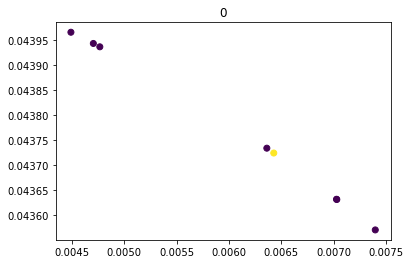

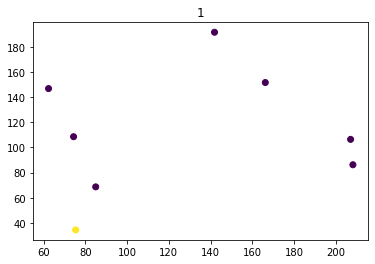

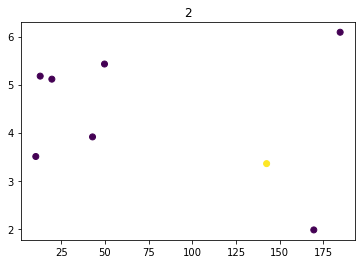

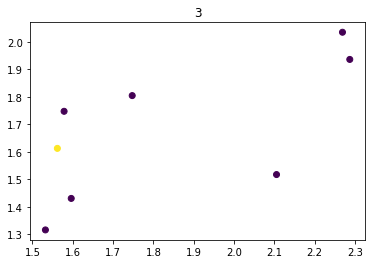

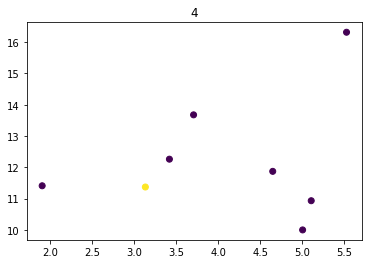

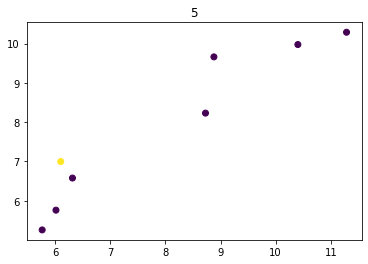

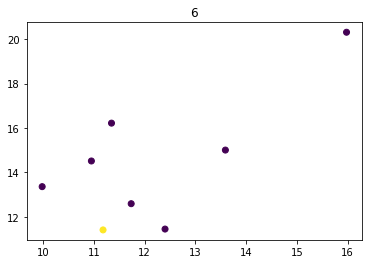

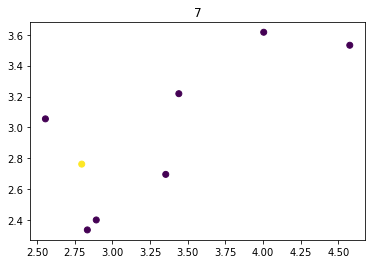

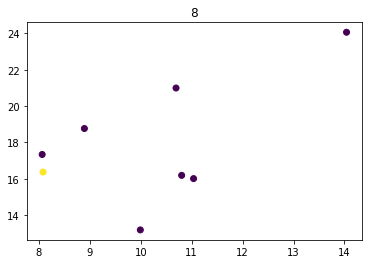

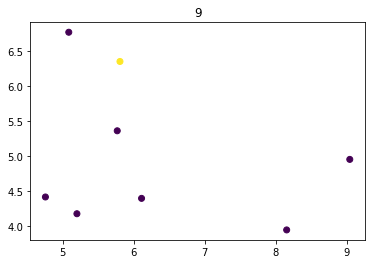

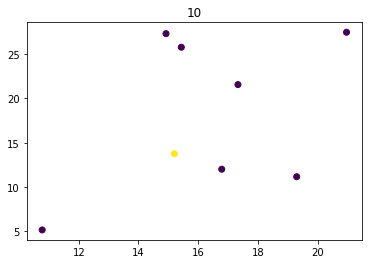

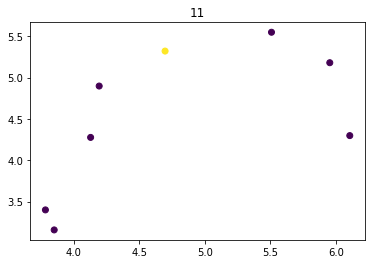

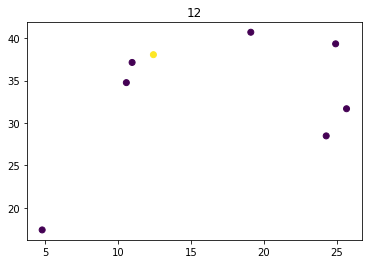

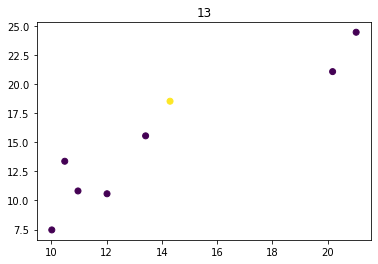

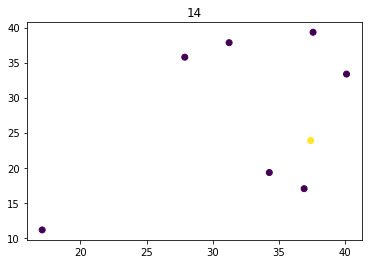

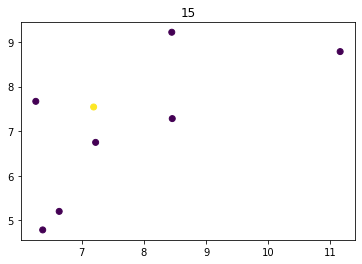

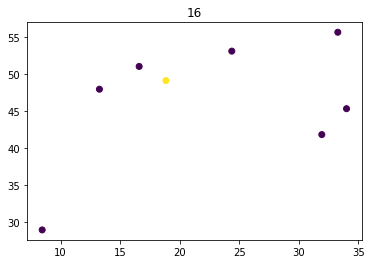

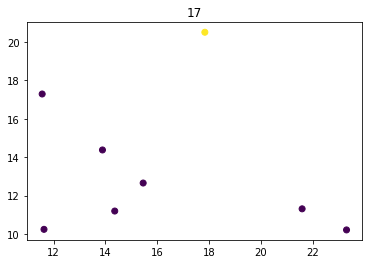

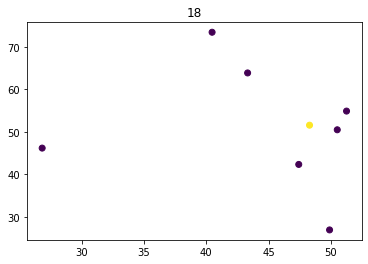

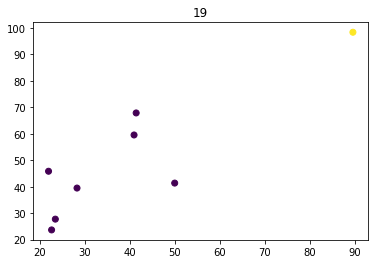

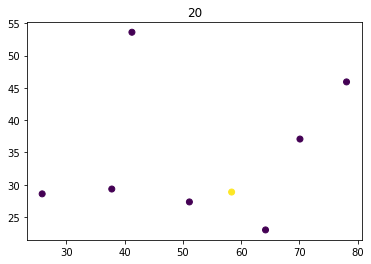

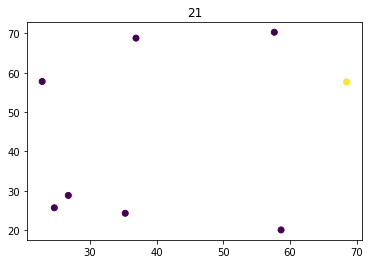

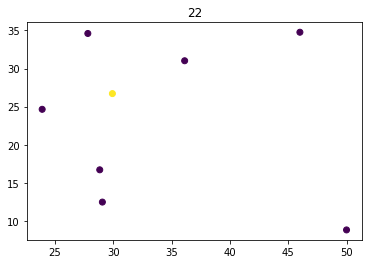

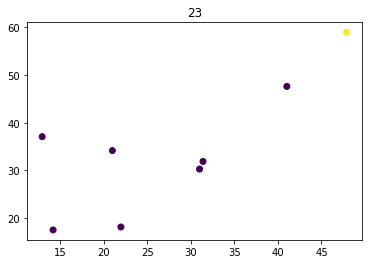

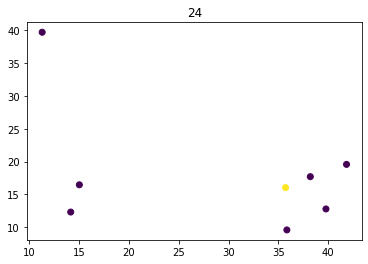

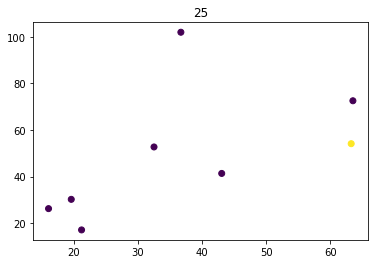

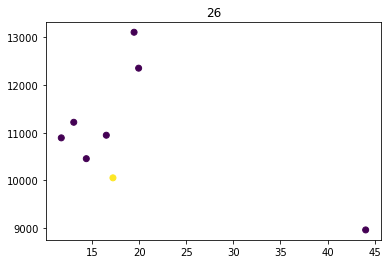

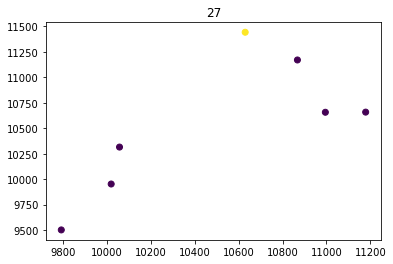

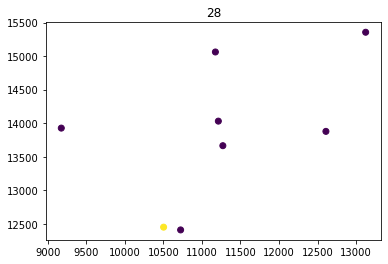

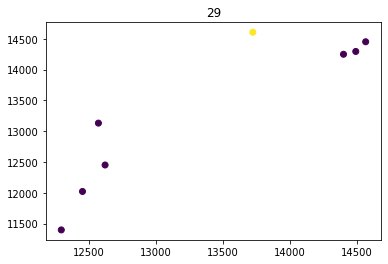

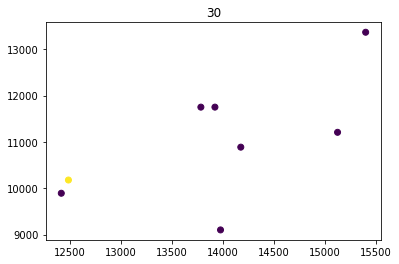

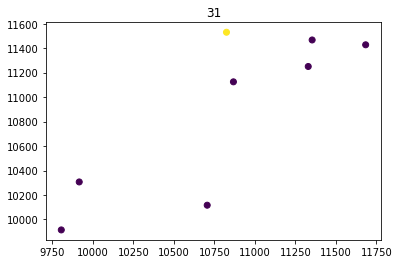

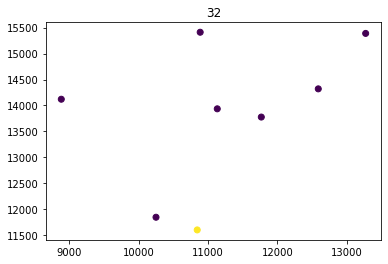

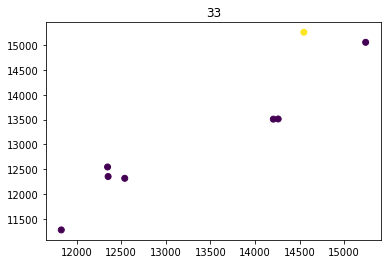

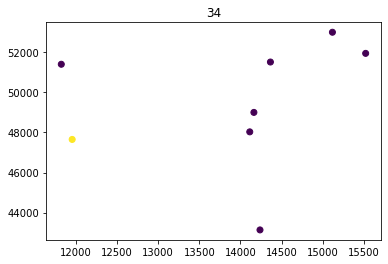

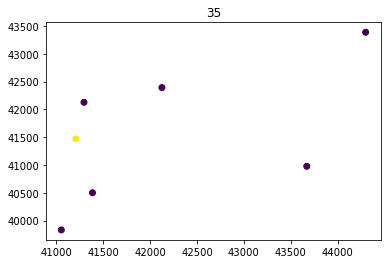

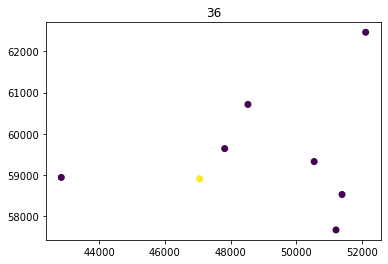

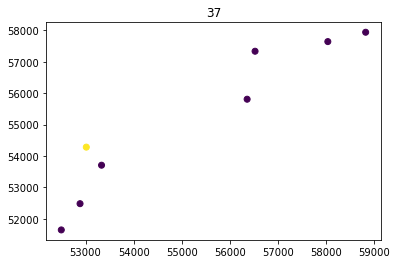

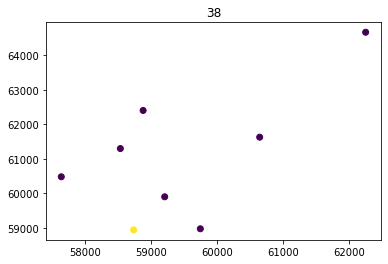

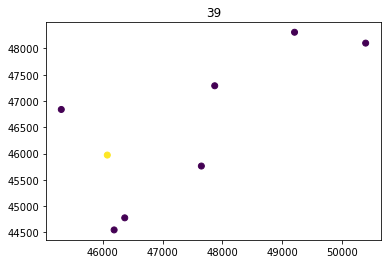

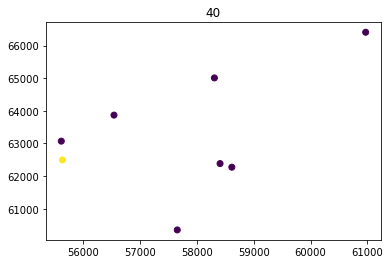

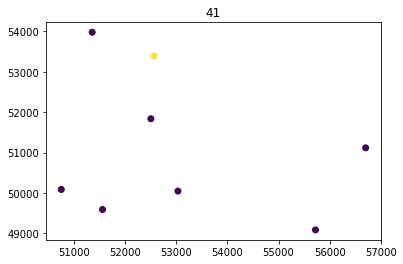

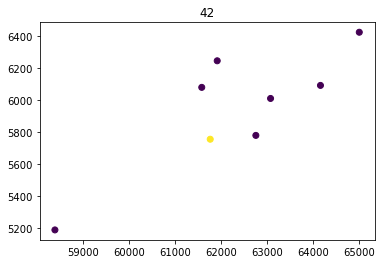

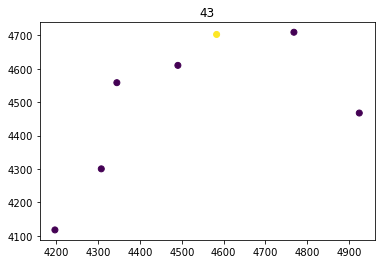

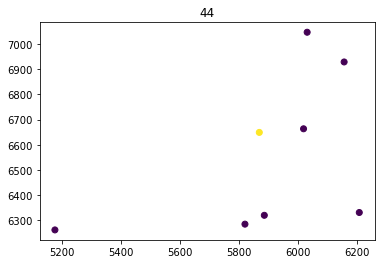

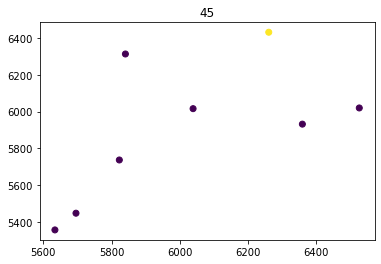

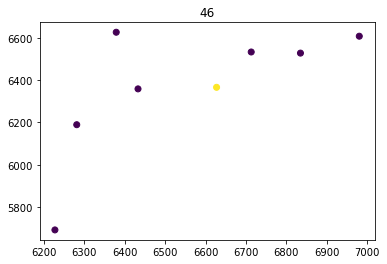

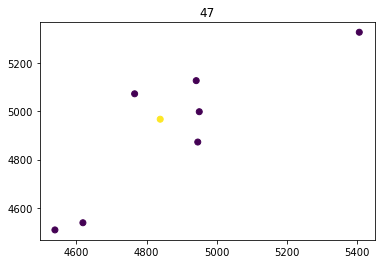

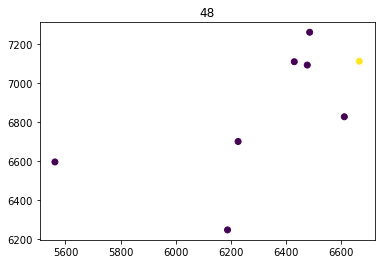

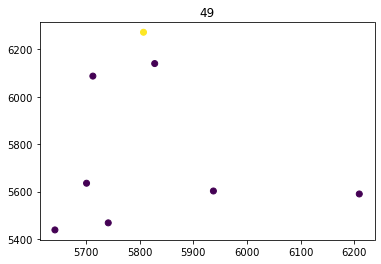

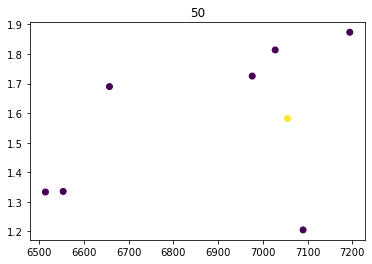

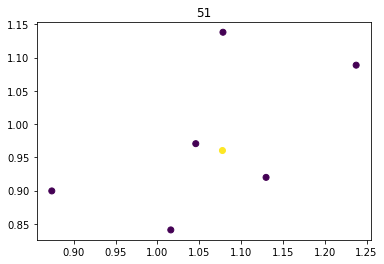

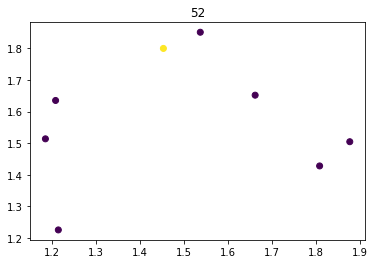

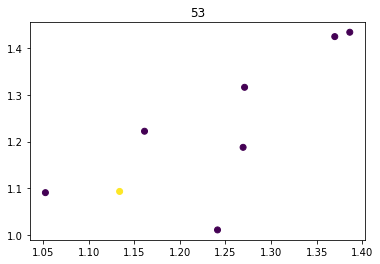

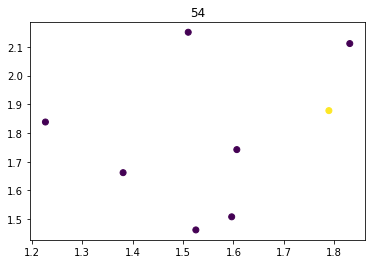

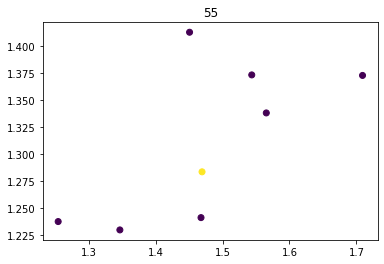

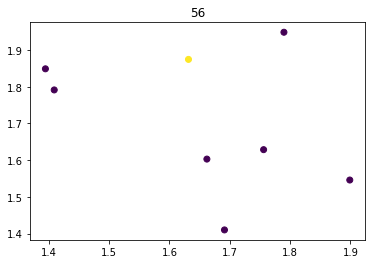

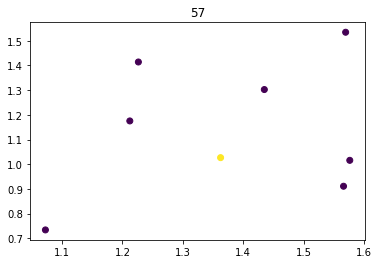

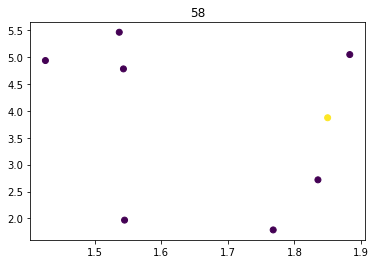

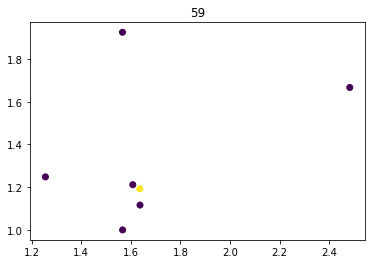

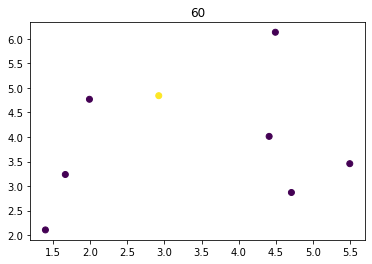

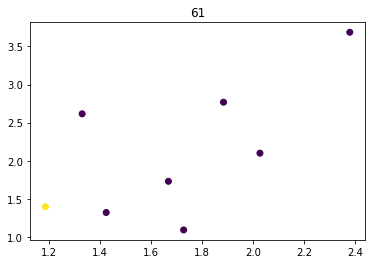

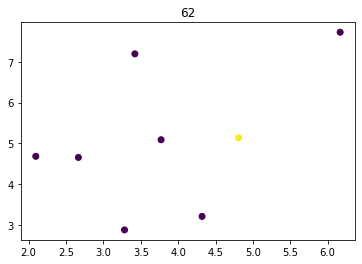

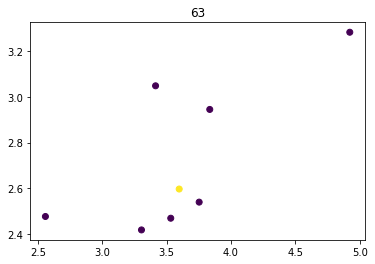

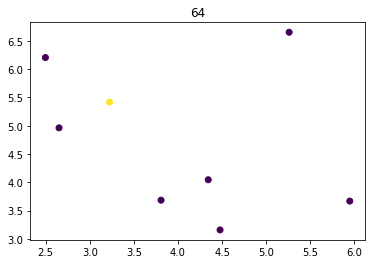

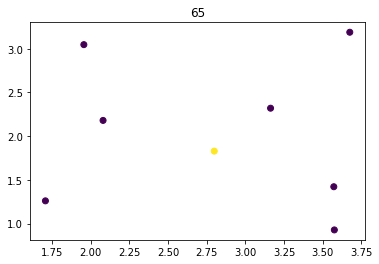

IndexError: single positional indexer is out-of-bounds

In [511]:
for i in range(len(features.columns)):
    plt.scatter(features.iloc[:,2*i], features.iloc[:,2*i+1], c=np.array(y_true_puzzles[5])[[1, 2,  5,  11, 13, 22, 25,27]])
    plt.title(i)
    plt.show()

# Cluster puzzle pieces

In [488]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, f_classif

def find_outlier(features, pred):
    mod_pred = pred
    
    cluster_id = list(np.unique(pred))
    for id in cluster_id:
        
        features_cluster = np.array(features)[np.squeeze(np.argwhere(pred == id)),:]
        
        #If there is an extra piece -> try to find outlier by clustering into two groups
        if (features_cluster.shape[0] - 1) in [9,12,16] or (features_cluster.shape[0] - 2) in [9,12,16] :
            Z = linkage(features_cluster, method='ward')
            new_cluster = fcluster(Z, t= 2, criterion='maxclust')
            
            mod_pred[np.squeeze(np.argwhere(pred == id))] = np.max(cluster_id) + new_cluster
            
    return mod_pred

def merge_cluster(pred):
    
    mod_pred = pred

    cluster_id = list(np.unique(pred))
    len_clusters = [np.sum(pred == id) for id in cluster_id]
    
    #Merging if addition of two clusters with incorrect shape get correct shape
    for i in range(len(len_clusters)):
        if len_clusters[i] not in [9,12,16]:
            
            for j in range(i+1, len(len_clusters)):
                if len_clusters[j] not in [9,12,16]:
                    
                    if (len_clusters[i] + len_clusters[j]) in [9,12,16] :
                        mod_pred[np.squeeze(np.argwhere(np.logical_or(pred == cluster_id[i], pred == cluster_id[j])))] = cluster_id[i]
            
    return mod_pred
              
            
def segment_cluster_pieces(path_img, nb_cluster, feat_idx=None, y_true=None):
    #Load image
    img = skimage.io.imread(path_img)
    
    #Segment image
    seg, contours = segment_pieces(img)
    
    #Extract puzzle pieces
    puzzles = extract_pieces(img, contours)
    
    #Extract features of puzzle feat
    features = [extract_features(x) for x in puzzles]
    features = np.array(pd.DataFrame(features))
    
    #Remplace inf + nan by median if they exist
    features[np.where(np.isinf(features))] = 9999
    
    col_mean = np.nanmedian(features, axis=0)
    inds = np.where(np.isnan(features))
    features[inds] = np.take(col_mean, inds[1])
    
    #Normalize features
    features_normalized = StandardScaler().fit_transform(features)
    x_df = pd.DataFrame(features_normalized)
    
    #Select relevent features
    df = x_df.iloc[:,feat_idx]
    
    #Perform hierarchical clustering
    Z = linkage(df, method='ward')
    pred = fcluster(Z, t= nb_cluster, criterion='maxclust')
    
    #Check cluster have coherent size, merge + split cluster if not
    pred = find_outlier(df, pred)
    pred = merge_cluster(pred)
    pred = find_outlier(df, pred)
    
    #Compute class-wise precision
    M = confusion_matrix(y_true, pred)
    prec= np.max(M,axis=1)/np.sum(M,axis=1)
    
    print(f'Precision for image ' + path_img + str(prec))
    
    return prec, pred, puzzles

In [489]:
y_true_puzzles = [[1, 1, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 2, 4, 3, 2, 3, 2],
                 [1,1,2,3,2, 1,1,2,2,1, 2,2,2,2,2, 1,1,1,3,1, 3],
                 [1,2,2,3,4,3, 4,3,4,4,2,4, 4,2,4,2,4,3, 2,3,3,2,3,3, 3,2,2,4],
                 [1,1,1,2,2, 1,2,2,2,2, 3,1,1,1,3, 2,1,1,2,3, 2],
                 [1,2,3,2,3, 2,3,2,2,2, 3,2,3,3,3, 2,1,3,2,3],
                 [1,2,2,3,3,2, 3,3,1,3,3,2, 1,2,1,3,1,1, 1,3,1,2,2,2, 3,4,1,2],
                 [1,2,1,2,2,1, 3,3,1,3,1,3 ,2,4,2,2,3,2, 1,3,4,2,3,2, 3,1,1,1,3],
                 [1,1,2,3,2,2, 4,1,3,1,3,3, 1,2,1,3,3,3, 2,1,3,3,2,1, 2,2,2,1],
                 [1,1,1,2,2,1, 1,2,1,2,2,1, 1,2,1,1,1,3, 1,2,1,1,2,1, 3,2],
                 [1,2,1,3,1,1, 1,4,2,2,1,2, 3,2,2,2,1,4, 2,4,4,2,1,4, 1,4,4,4],
                 [1,1,2,3,2,2, 3,3,1,2,2,3, 1,3,1,2,2,1, 1,3,1,2,1,2, 4,3,3,3],
                 [1,2,2,3,3, 2,2, 3,3,2, 3,2,3,3,2, 2,3,3,2]
                 ]

In [516]:
import warnings

warnings.filterwarnings("ignore")

feat = [0, 1, 2, 3, 4, 25, 28, 29, 43, 52, 55, 69, 72, 73, 74, 75, 76, 83, 122, 123,
        35, 38, 39]

nb_cluster = [4,3,4,3,3,4,4,4,4,4,4,4]

# Iterate over all files in the directorys
precisions, clusters, pieces = [], [], []
for i, file_name in enumerate(os.listdir('data_project/train2')):
    if file_name.endswith('.png'):
        prec, pred, piece = segment_cluster_pieces('data_project/train2/' + file_name, nb_cluster[i], feat, y_true = y_true_puzzles[i])
        precisions.append(prec); clusters.append(pred); pieces.append(piece)
        
print(np.nanmean(np.concatenate(precisions)))

Precision for image data_project/train2/train_00.png[1. 1. 1. 1.]
Precision for image data_project/train2/train_01.png[1. 1. 1.]
[2 1 1 1 1 1 1 1 1 1]
Precision for image data_project/train2/train_02.png[ 1.  1.  1.  1. nan nan]
Precision for image data_project/train2/train_03.png[1. 1. 1.]
Precision for image data_project/train2/train_04.png[1. 1. 1.]
[2 2 1 1 2 2 2 2 1 2]
Precision for image data_project/train2/train_05.png[1.         0.77777778 1.         1.                nan]
Precision for image data_project/train2/train_06.png[1. 1. 1. 1.]
Precision for image data_project/train2/train_07.png[1. 1. 1. 1.]
[1 2 2 2 1 1 1 1 1 2 2 2 2 1 2 1 2]
Precision for image data_project/train2/train_08.png[0.53333333 1.         1.                nan]
Precision for image data_project/train2/train_09.png[1. 1. 1. 1.]
[1 1 1 1 1 1 2 1 1 1]
[1 1 1 1 1 1 1 1 1 2]
Precision for image data_project/train2/train_10.png[ 1.  1.  1.  1. nan nan nan]
Precision for image data_project/train2/train_11.png[1. 

[ 3  4  6  7  9 10 15 19 24]


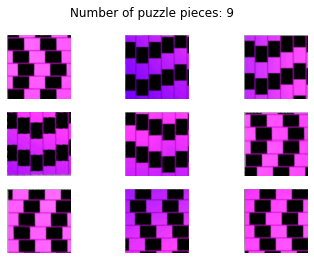

[ 0  8 12 14 16 17 18 20 26]


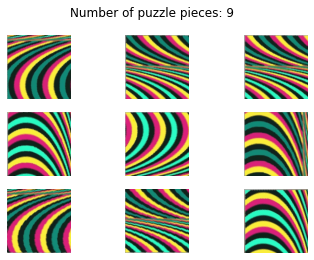

[ 5 11 25]


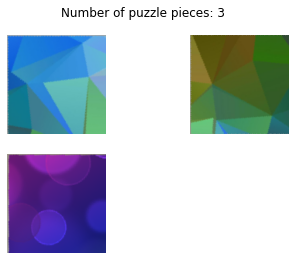

[ 1  2 13 21 22 23 27]


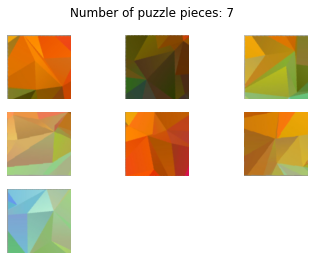

In [515]:
i = 5
for u in np.unique(clusters[i]):
    print(np.squeeze(np.argwhere(clusters[i] == u)))
    display_images_in_grid(np.array(pieces[i])[np.squeeze(np.argwhere(clusters[i] == u))])

### Feature selection using PCA

Apply PCA to feature DataFrame 

1. Normalization of features before PCA to make them comparable

In [113]:
features.columns[0:55]

Index(['mean_color', 'std_color', 'avg_red', 'avg_green', 'avg_blue',
       'mean_gabor_1', 'mean_gabor_2', 'mean_gabor_3', 'mean_gabor_4',
       'mean_gabor_5', 'mean_gabor_6', 'mean_gabor_7', 'mean_gabor_8',
       'mean_gabor_9', 'mean_gabor_10', 'mean_gabor_11', 'mean_gabor_12',
       'mean_gabor_13', 'mean_gabor_14', 'mean_gabor_15', 'mean_gabor_16',
       'std_gabor_1', 'std_gabor_2', 'std_gabor_3', 'std_gabor_4',
       'std_gabor_5', 'std_gabor_6', 'std_gabor_7', 'std_gabor_8',
       'std_gabor_9', 'std_gabor_10', 'std_gabor_11', 'std_gabor_12',
       'std_gabor_13', 'std_gabor_14', 'std_gabor_15', 'std_gabor_16',
       'kurtosis_gabor_1', 'kurtosis_gabor_2', 'kurtosis_gabor_3',
       'kurtosis_gabor_4', 'kurtosis_gabor_5', 'kurtosis_gabor_6',
       'kurtosis_gabor_7', 'kurtosis_gabor_8', 'kurtosis_gabor_9',
       'kurtosis_gabor_10', 'kurtosis_gabor_11', 'kurtosis_gabor_12',
       'kurtosis_gabor_13', 'kurtosis_gabor_14', 'kurtosis_gabor_15',
       'kurtosis_gabor_

In [114]:
features.head()

,mean_color,std_color,avg_red,avg_green,avg_blue,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,...,kurtosis_power_7,kurtosis_power_8,kurtosis_power_9,kurtosis_power_10,kurtosis_power_11,kurtosis_power_12,kurtosis_power_13,kurtosis_power_14,kurtosis_power_15,kurtosis_power_16
0,0.004010,0.044012,161.476624,201.185547,152.950195,14.412109,14.240051,14.702209,13.930420,40.563660,...,1.448627,0.966862,2.429222,2.892763,2.957026,1.907623,1.791348,2.704071,2.283191,1.445609
1,0.004349,0.043980,153.516418,194.719482,140.038269,14.710388,16.256470,14.720276,14.247925,48.813049,...,1.626747,0.737047,2.320839,2.290295,2.482193,2.188546,1.321676,2.472003,2.368995,1.165282
2,0.004192,0.043995,156.800171,193.615967,143.501892,16.260986,12.384338,13.384644,15.708435,46.866272,...,1.568220,0.778341,2.871416,2.752693,2.616266,2.110025,1.482149,2.589765,2.546753,1.168367
3,0.003721,0.044037,145.372559,139.010193,139.338684,16.032532,15.222107,13.779480,16.018982,37.495117,...,1.756675,0.592504,2.396829,2.928047,2.420611,2.124510,1.238447,2.813580,2.352571,1.248623
4,0.003620,0.044046,142.210693,138.443481,138.709717,13.056030,16.583557,13.600708,12.807129,38.411072,...,1.782967,0.726882,2.553949,3.469017,2.252738,2.396837,1.399318,2.685317,2.269542,1.312347


In [115]:
features = features.iloc[:, 0:55]

features_normalized = StandardScaler().fit_transform(features)
features_normalized.shape

(21, 55)

2. Apply PCA

The cumulative variance array shows the proportion of the total variance that is explained by the first principal component, the first two principal components, the first three principal components, and so on. It provides insights into how many principal components are needed to capture a desired amount of information or variance in the dataset.

The cumulative variance curve can help determine the optimal number of principal components to retain for dimensionality reduction or feature selection. By setting a threshold for the cumulative variance (e.g., 95% of the total variance), you can select the smallest number of principal components that capture a significant portion of the variance in the data.

In summary, cumulative variance provides a measure of the accumulated information explained by each principal component, while the explained variance ratio quantifies the contribution of each individual component to the total variance

The elbow method is a common approach used to determine the suitable number of principal components (PCs) to retain in PCA. It involves plotting the cumulative explained variance as a function of the number of PCs and looking for a point on the plot where adding more PCs does not significantly increase the explained variance. This point is often referred to as the "elbow" and indicates a suitable number of PCs to retain.

Here's an example of how you can use the elbow method to determine the suitable number of PCs in PCA:

Explained variation per PC 1: 0.5330140031745553
Explained variation per PC 2: 0.2234542347813618
Explained variation per PC 3: 0.09765044561504113
Explained variation per PC 4: 0.05150256599571244
Explained variation per PC 5: 0.03140840512860745
Explained variation per PC 6: 0.01824576936938888
Explained variation per PC 7: 0.01099690002892465
Explained variation per PC 8: 0.007665973771700366
Explained variation per PC 9: 0.006335347629588714
Explained variation per PC 10: 0.004953969945675412
Explained variation per PC 11: 0.003669873730880965
Explained variation per PC 12: 0.0029182450452145572
Explained variation per PC 13: 0.002010498975622538
Explained variation per PC 14: 0.0018134458620779096
Explained variation per PC 15: 0.0012448446530141522
Explained variation per PC 16: 0.000976816283718277
Explained variation per PC 17: 0.0008596580387842489
Explained variation per PC 18: 0.0006543573695909158
Explained variation per PC 19: 0.00038161465183102054
Explained variation per

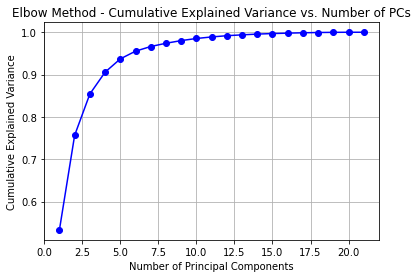

In [116]:
pca = PCA()

# Fit the data and perform PCA
pca.fit(features_normalized)

# Access the principal components and explained variance ratios
principal_components = pca.components_
explained_variance_ratios = pca.explained_variance_ratio_

# Print the principal components and explained variance ratios
for i, pc in enumerate(principal_components):
    print(f"Explained variation per PC {i+1}: {explained_variance_ratios[i]}")

print("Cumulative Explained Variance:",explained_variance_ratios.cumsum())
# Compute the cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratios)

# Plot the cumulative variance to determine PC components : "elbow method"
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method - Cumulative Explained Variance vs. Number of PCs')
plt.grid(True)
plt.show()

3. Result according to "elbow method": take first 4 PC

In [117]:
# Dump components relations with features:
x_df = pd.DataFrame(features_normalized)
loadings = pd.DataFrame(pca.components_[:4],columns=x_df.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
#loadings = pd.DataFrame(pca.components_[:7],columns=x_df.columns)

In [118]:
loadings

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
PC-1,-0.005396,0.006935,-0.098557,-0.029870,0.152373,0.171436,0.171803,0.170800,0.169456,0.137842,...,-0.143028,-0.131048,-0.091713,-0.127005,-0.130549,-0.113406,-0.107592,-0.119581,0.128554,0.168629
PC-2,0.194318,-0.196596,0.072689,0.197227,-0.029316,-0.066893,0.065146,0.084933,-0.069612,-0.051508,...,0.091642,-0.174237,-0.202011,0.150377,0.156407,-0.188317,-0.210804,0.173580,-0.105950,-0.013246
PC-3,0.287655,-0.286654,0.227410,0.264453,-0.102447,-0.058876,-0.065572,-0.010914,-0.073151,0.266375,...,-0.086696,-0.035139,-0.100715,-0.058362,-0.141776,-0.031569,-0.012836,-0.132609,-0.117782,-0.124322
PC-4,0.101147,-0.097948,0.026204,0.137469,0.199706,0.129028,-0.064766,0.031633,0.138248,0.002861,...,-0.110079,-0.059209,-0.219687,-0.110277,0.103850,0.148018,0.018741,0.137133,0.111478,-0.054642


4. Identify the features belongs to first N PC

In [119]:
selected_features = []
for i in range(4):
    features_pc = loadings.iloc[i].abs().nlargest(5).index
    selected_features.extend(features_pc)
    
    print("Features belonging to Principal Component", i + 1, ":")
    print(features_pc)

selected_features = np.unique(selected_features)

Features belonging to Principal Component 1 :
Int64Index([23, 6, 5, 7, 8], dtype='int64')
Features belonging to Principal Component 2 :
Int64Index([36, 33, 51, 39, 47], dtype='int64')
Features belonging to Principal Component 3 :
Int64Index([41, 0, 1, 44, 12], dtype='int64')
Features belonging to Principal Component 4 :
Int64Index([34, 26, 29, 32, 47], dtype='int64')


In [120]:
selected_features

array([ 0,  1,  5,  6,  7,  8, 12, 23, 26, 29, 32, 33, 34, 36, 39, 41, 44,
       47, 51])

5. Extract samples and corresponding indexing of features 

In [39]:
df = x_df.iloc[:,selected_features]
df.shape

(21, 19)

In [40]:
df.head()

,0,1,4,5,6,8,22,25,28,31,32,33,35,38,40,43,46,50,54
0,0.364748,-0.317967,-0.323890,-0.231956,-0.211515,-0.337983,-0.549453,0.150197,0.078960,0.076081,-0.851783,-0.370235,-1.192957,-0.682791,0.616550,0.852915,-0.525544,-0.543875,-0.530588
1,1.238543,-1.254274,-0.254705,0.275103,-0.206435,1.381278,-0.672523,0.197077,-0.661443,-0.579570,-0.249002,0.921614,-0.107577,-0.852807,-1.512434,-1.492433,-0.528113,0.168831,-0.255272
2,0.833759,-0.810987,0.104957,-0.698604,-0.581940,0.975548,-0.874895,-0.998280,0.486238,0.353548,0.079681,-1.549280,-0.080963,-0.391758,-1.058249,-0.968489,-0.182439,0.888608,-0.581675
3,-0.378872,0.418429,0.051967,0.014997,-0.470934,-0.977500,-0.342131,0.493178,0.238476,0.169181,-0.016190,0.202607,-0.036639,0.451705,1.038247,1.238332,0.654400,1.363915,0.134064
4,-0.639280,0.663102,-0.638433,0.357354,-0.521195,-0.786605,-0.218786,1.075132,-0.696432,-0.628071,0.116567,1.139416,0.052268,0.926395,0.913056,0.787733,1.323623,0.383829,-0.049656


# Unsupervised learning 

### 1. Approach : Affinity Propagation

**Result**:  define only the right second puzzle (all 9 samples belongs to one (2) class), the last 3 sample which belongs to the third puzzle assigned to the 3 and 4 class, and samples from the first puzzle were assigned to the 1 and 0 class.

**+** - already see some result 

**-** - hard to determine images which not belong to the puzzle

In [41]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation().fit(df)

clustering.labels_

array([0, 3, 3, 1, 1, 0, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 0, 3, 1, 2, 3],
      dtype=int64)

### 2. Approach : Agglomerative Clustering

**Result**:  define only the right sampels belong to third puzzle

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering()

# Fit the data and obtain the cluster labels
cluster_labels = clustering.fit_predict(df)

# Print the cluster labels
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]


### 3. Approach :Gaussian Mixture

**Result**:  define all sampels right
**+** - define all sampels right

**-** - need prior knowledges about number of classes

In [36]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Create an instance of GaussianMixture
gmm = GaussianMixture(n_components=3)  # You can adjust the number of components

# Fit the data and obtain the cluster labels
cluster_labels = gmm.fit_predict(df)

# Print the cluster labels
print(cluster_labels)


[0 0 0 2 2 0 2 2 2 2 1 0 0 0 1 2 0 0 2 1 2]


### 4. Approach : K Means

**Result**:  define first puzzle samples right, confuse about 2 sampels which belongs to second and thirds class(were assigned vise versa)

**+** - define 90% sampels right

**-** - need prior knowledges about number of classes, still do mistake 

In [37]:
from sklearn.cluster import KMeans
import numpy as np

# Create an instance of KMeans
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters

# Fit the data and obtain the cluster labels
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)


[0 0 0 1 1 0 1 1 1 1 1 0 0 0 2 1 0 0 1 2 1]


### 4.2 Approach: K Means without adjusting the number of classes


**Result**: were 7 classes but the first puzzle samples were assigned to 1,5,6 class, the second puzzle samples to 3 and 0, and the third puzzle sampels to 4,7,2

**+** - somehow right assigned (assigned classes do not overlapping) if possible to merge classes

**-** - need additional technique to merge classes

In [38]:
# Without adjusting number of classes
# Create an instance of KMeans
kmeans = KMeans()  # You can adjust the number of clusters

# Fit the data and obtain the cluster labels
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)

[3 1 1 7 4 6 4 0 0 0 2 3 6 3 2 0 6 1 0 5 7]


### 5. Approach: Mean Shift clustering


**Result**: assigned first and second puzzles samples right, third one assigned one sample to additional class

**+** - works nice, right assigned 95% of samples 

**-** - need adjust bandwidth parameter

In [39]:
from sklearn.cluster import MeanShift

# Create an instance of Mean Shift
mean_shift = MeanShift(bandwidth=4)

# Perform clustering
labels = mean_shift.fit_predict(df)

labels

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 3, 0],
      dtype=int64)

### 5.1 Approach: Mean Shift clustering without adjust bandwidth parameter


**Result**: assigned first and second puzzles samples right, third one assigned one sample to additional class

**+** - works nice, right assigned 95% of samples 


In [40]:
from sklearn.cluster import MeanShift


# Create an instance of Mean Shift
mean_shift = MeanShift()

# Perform clustering
labels = mean_shift.fit_predict(df)

labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0],
      dtype=int64)

### 6. Approach: Spectral Clustering


**Result**: assigned all samples right

**+** - assigned all samples right

**-** - need adjust number of clusters

In [41]:
from sklearn.cluster import SpectralClustering


# Create an instance of Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)

# Perform clustering
labels = spectral_clustering.fit_predict(df)
labels

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0])

# Find number of classes in data set as a prior knowledge for classification

### 1. Approach : Elbow method
    
**Result** : 3 classes
**-** - only visually can be detected


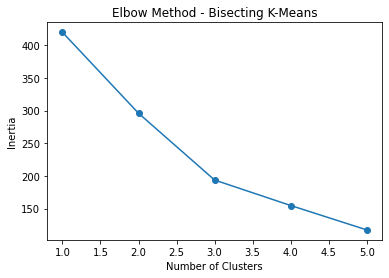

In [42]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Perform Bisecting K-Means with varying number of clusters
max_clusters = 5
inertias = []
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) as a function of the number of clusters
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Bisecting K-Means')
plt.show()


### 2. Approach : Silhouette Score
    
**Result** : detect only 2 classes

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df
# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform K-Means with different numbers of clusters
silhouette_scores = []
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters with the highest Silhouette Score
optimal_num_clusters = np.argmax(silhouette_scores) + min_clusters

print("Optimal number of clusters:", optimal_num_clusters)


Optimal number of clusters: 2


### 3. Approach : Calinski-Harabasz Index
    
**Result** : too many classes

In [44]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Generate a synthetic dataset
X = df

# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform K-Means with different numbers of clusters
scores = []
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = calinski_harabasz_score(X, labels)
    scores.append(score)

# Find the optimal number of clusters with the highest Calinski-Harabasz score
optimal_num_clusters = np.argmax(scores) + min_clusters

print("Optimal number of clusters:", optimal_num_clusters)




Optimal number of clusters: 10


# 4. Approach : Dendrogram !!!
    
**Result** : Super! works and can use for classification directly. Looke at result below

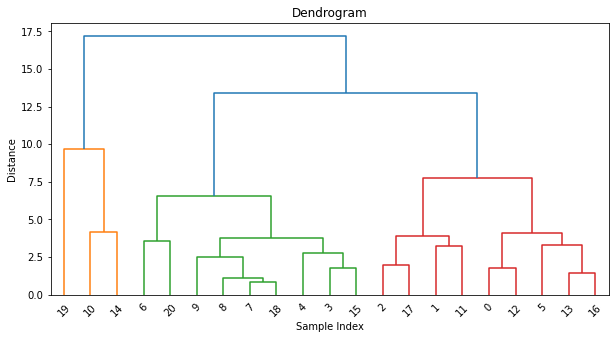

In [44]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X = df

# Perform hierarchical clustering
Z = linkage(X, method='ward')
pred = fcluster(Z, t= 3, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix

M = confusion_matrix(y_true, pred)
np.max(M,axis=1)/np.sum(M,axis=1)

array([1., 1., 1.])